# Linear Regression with Cross Validation

## Setting Up The Working Environment

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
data= pd.read_csv('housing.csv')

In [147]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [148]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Text(0, 0.5, 'Avg. Area Income ')

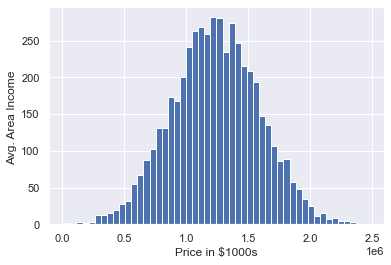

In [150]:
plt.hist(data.Price, bins=50)

# label the axes 
plt.xlabel('Price in $1000s')
plt.ylabel('Avg. Area Income ')

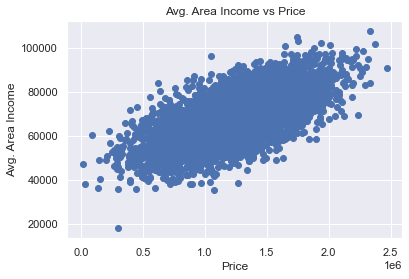

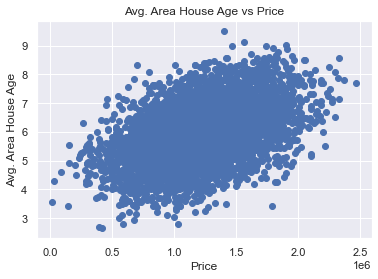

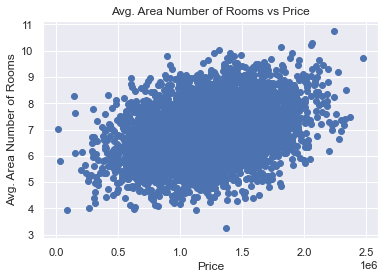

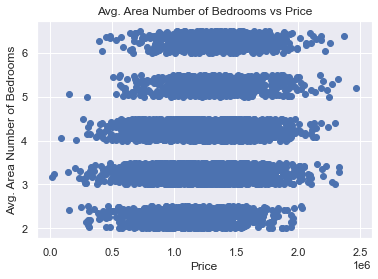

In [151]:
 def scatter_plot(x):
    
    plt.scatter(data['Price'], data[x])
    plt.title(x +' vs Price') #title of the graph
    plt.xlabel('Price') #x-axis
    plt.ylabel(x) #y-axis
    plt.show()


scatter_plot('Avg. Area Income') 
scatter_plot('Avg. Area House Age') 
scatter_plot('Avg. Area Number of Rooms') 
scatter_plot('Avg. Area Number of Bedrooms') 


In [152]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

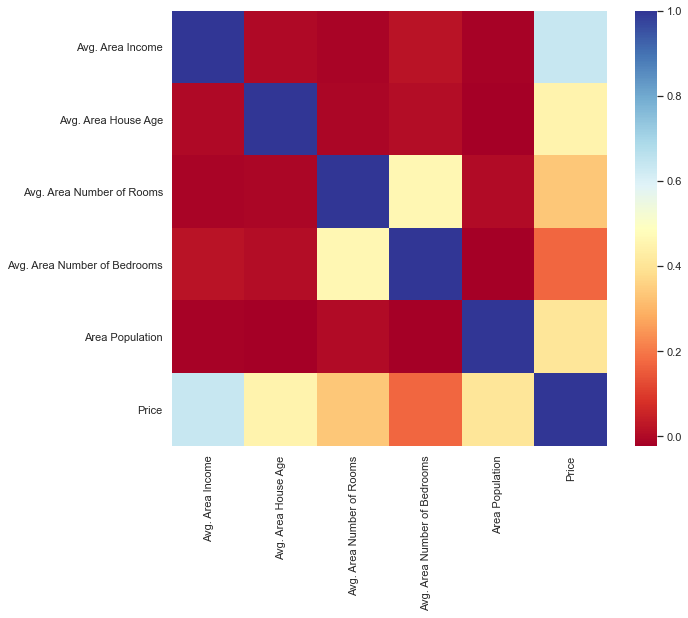

In [153]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(), cmap='RdYlBu', square=True)

In [154]:
data1=data.drop(['Address'], axis=1)

In [155]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data1)
data1 = sc.transform(data1)

In [158]:
data1

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867,
        -0.49008146],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945,
         0.77550829],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989,
        -0.49021053],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658,
        -0.570244  ],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608,
        -0.0946402 ],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464,
         0.18941143]])

In [163]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [167]:
data2=pd.DataFrame(data=data1 , columns =['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'])

In [168]:
data2

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518
...,...,...,...,...,...,...
4995,-0.752109,1.869297,-0.845588,-0.422467,-1.342732,-0.486795
4996,0.929740,1.030822,-0.408686,0.031337,-1.062747,0.709594
4997,-0.487235,1.284470,-2.170269,-1.500251,-0.291937,-0.570244
4998,-0.054592,-0.446694,0.141541,1.182053,0.651116,-0.094640


In [170]:
#define the input [x] and the output / prediction data
#define the y first 
y=data2['Price']
# now the input data 
x=data2.drop(['Price'], axis=1)

In [171]:
y.head()

0   -0.490081
1    0.775508
2   -0.490211
3    0.080843
4   -1.702518
Name: Price, dtype: float64

In [172]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387
...,...,...,...,...,...
4995,-0.752109,1.869297,-0.845588,-0.422467,-1.342732
4996,0.929740,1.030822,-0.408686,0.031337,-1.062747
4997,-0.487235,1.284470,-2.170269,-1.500251,-0.291937
4998,-0.054592,-0.446694,0.141541,1.182053,0.651116


In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [175]:
reg = LinearRegression()

In [176]:
reg.fit(X_train, y_train)

LinearRegression()

In [177]:
predict = reg.predict(X_test)

In [178]:
predict

array([ 0.17831137,  1.51356529, -0.4856099 , ...,  0.97243151,
       -1.09913319, -0.91667308])

In [179]:
reg.score(X_test, y_test)


0.9199287959786013

In [180]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,predict))
rmse

0.2808177368395661

# Import the necessary tools for performing Cross Validation

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

In [182]:
lreg = LinearRegression()

# perform cross validation

In [183]:
cv_results = cross_val_score(lreg, x, y, cv = 5)

In [184]:
print(type(cv_results))

<class 'numpy.ndarray'>


In [185]:
cv_results

array([0.91758995, 0.92030155, 0.91524299, 0.92085038, 0.91381118])

# compute the average R^2

In [186]:
avg_r_sq = np.mean(cv_results)
print(f"The average R^2 is: {avg_r_sq :.4f}")

The average R^2 is: 0.9176


In [187]:
# Create linear regression object
lreg_cv = LinearRegression()

In [188]:
# make mae scorer
mae = make_scorer(mean_absolute_error)
# perform 5-fold CV
cv_res = cross_val_score(lreg_cv,
                         x, y,
                        cv = 5,
                        scoring=mae)

In [189]:
print(cv_res)

[0.22787389 0.23863019 0.22607136 0.23051244 0.23062214]


# Print the mean error

In [190]:
print(cv_res.mean())

0.2307420040014852


In [191]:
mse = make_scorer(mean_squared_error)
cv_res = cross_val_score(lreg_cv,
                         x, y,
                        cv = 5,
                        scoring=mse)

In [192]:
print(cv_res)

[0.08091231 0.08605404 0.07910359 0.0816279  0.08354542]


# Print the mean error

In [193]:
print(cv_res.mean())

0.08224865055235328
